# E-Commerce Dataset #Bukapedia
Kelompok 1: 
- Fildzah Zhafarina 
- Nabilah Nurul Fikri 
- Wahyuni 
- Sakti Hakim Nasution 
- Ryan Hardi 
- Alifian Darmawan 
- Tiurmauli Rahel Ernita

Skenario 1 : Split data - Label Encoding - Handling Missing Value

#Install Package

In [ ]:
!pip install catboost
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import catboost as cb

import shap

# google drive auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [ ]:
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# STAGE 1


## Read Dataset


In [ ]:
# Read Dataset
df = pd.read_excel('/content/drive/MyDrive/Kelompok 1/Document /E Commerce Dataset.xlsx','E Comm')
data = df
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2795,52796,0,8.0,Mobile Phone,2,32.0,Debit Card,Female,2.0,3,Fashion,1,Single,2,1,16.0,1.0,1.0,7.0,188.37
861,50862,0,12.0,Mobile Phone,3,27.0,Debit Card,Male,2.0,4,Laptop & Accessory,2,Divorced,4,1,12.0,0.0,1.0,4.0,161.20
198,50199,1,0.0,Phone,1,8.0,CC,Male,2.0,5,Mobile,2,Divorced,6,1,13.0,2.0,2.0,2.0,134.64
5249,55250,0,11.0,Mobile Phone,1,20.0,Credit Card,Male,3.0,4,Laptop & Accessory,1,Married,3,0,18.0,3.0,4.0,8.0,167.85
4046,54047,0,15.0,Mobile Phone,3,15.0,E wallet,Female,3.0,4,Laptop & Accessory,4,Married,7,0,22.0,2.0,2.0,5.0,168.93


In [ ]:
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
nums = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
        'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'CityTier', 'SatisfactionScore','Complain']

#memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

#memisahkan data tipe Kategorikal(Ordinal dan Nominal)
kategorikal_ordinal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
kategorikal_nominal = ['Churn', 'CityTier', 'SatisfactionScore','Complain']

## Descriptive Statistics

In [ ]:
#informasi general dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
#cek missing value setiap kolom
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

1. Terdapat missing value di beberapa kolom seperti Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder
2. Tipe data sudah sesuai

In [ ]:
#Statistika Summary Numerikal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [ ]:
#Statistika Summary Kategorikal
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630
unique,3,7,6,3
top,Mobile Phone,Debit Card,Laptop & Accessory,Married
freq,2765,2314,2050,2986


1. Dari summary numericals, tidak terlihat ada data yang aneh. Namun ada beberapa kolom yang skew.
2. Kolom churn dan complain ternyata bernilai boolean.
3. Dan dari summary categoricals pun tidak terlihat adanya keanehan data. Jumlah unik dari value kolomnya pun masih wajar, jadi tidak ada yang perlu didrop.

### Melihat Ketimpangan Data di Categoricals (Value Counting)

In [ ]:
for col in cats:
  print(f'''Value count kolom{col}:''')
  print(df[col].value_counts())
  print()

Value count kolomPreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolomPreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolomPreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolomMaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



## Univariate Analysis

### Individual Boxplot (kontinu_interval)

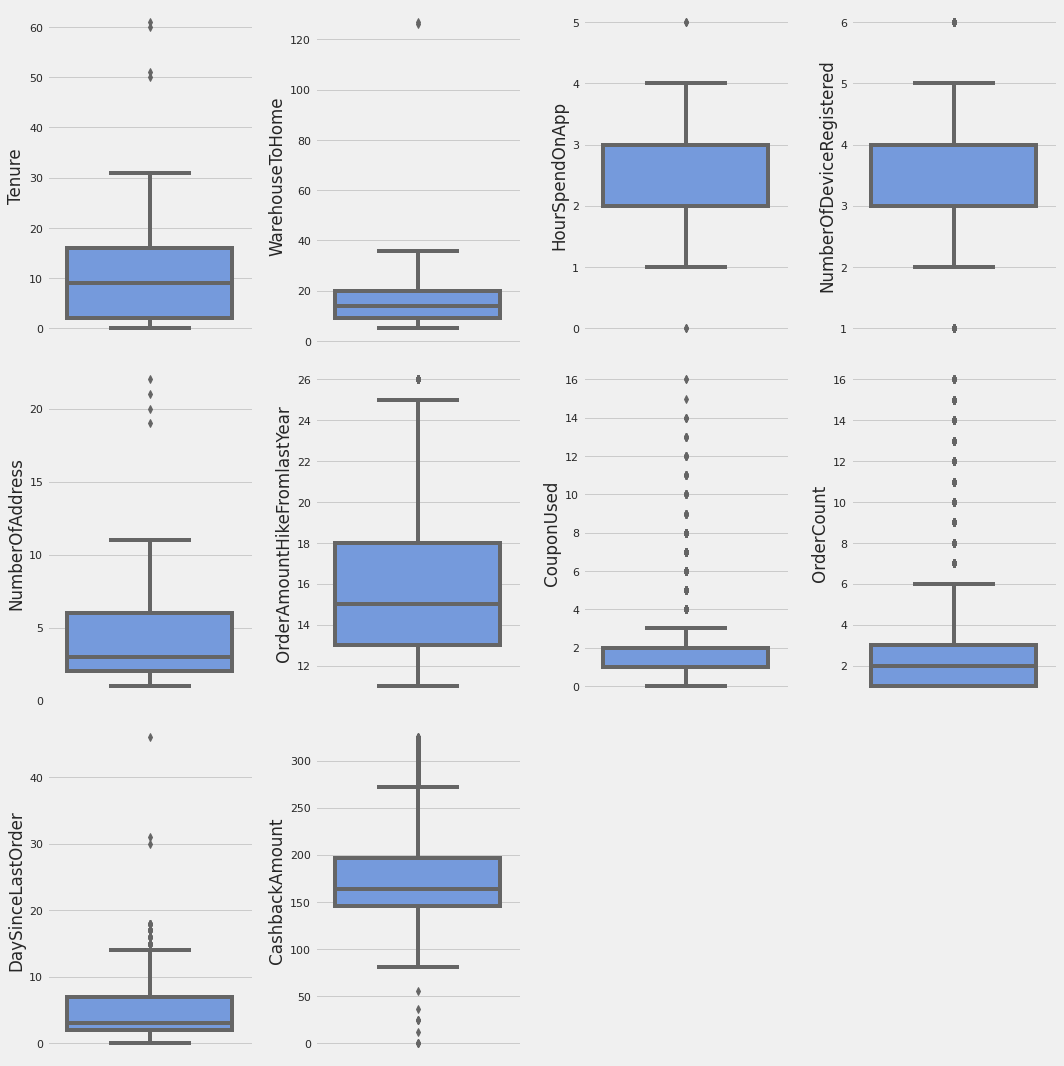

In [ ]:
features = kontinu_interval
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

1. Dari visualisasi boxplot di atas terdapat outlier yang sangat jauh jaraknya yaitu ada di kolom Tenure, WarehouseToHome, NumberOfAddress, dan DaySinceLastOrder.

2. Dan diketahui ada kolom yang menjalar skewed ke kanan yaitu Tenure, WarehouseToHome, NumberOfAddress, CouponUsed, OrderCount, dan DaySinceLastOrder.

### Individual Displot (kontinu_interval)

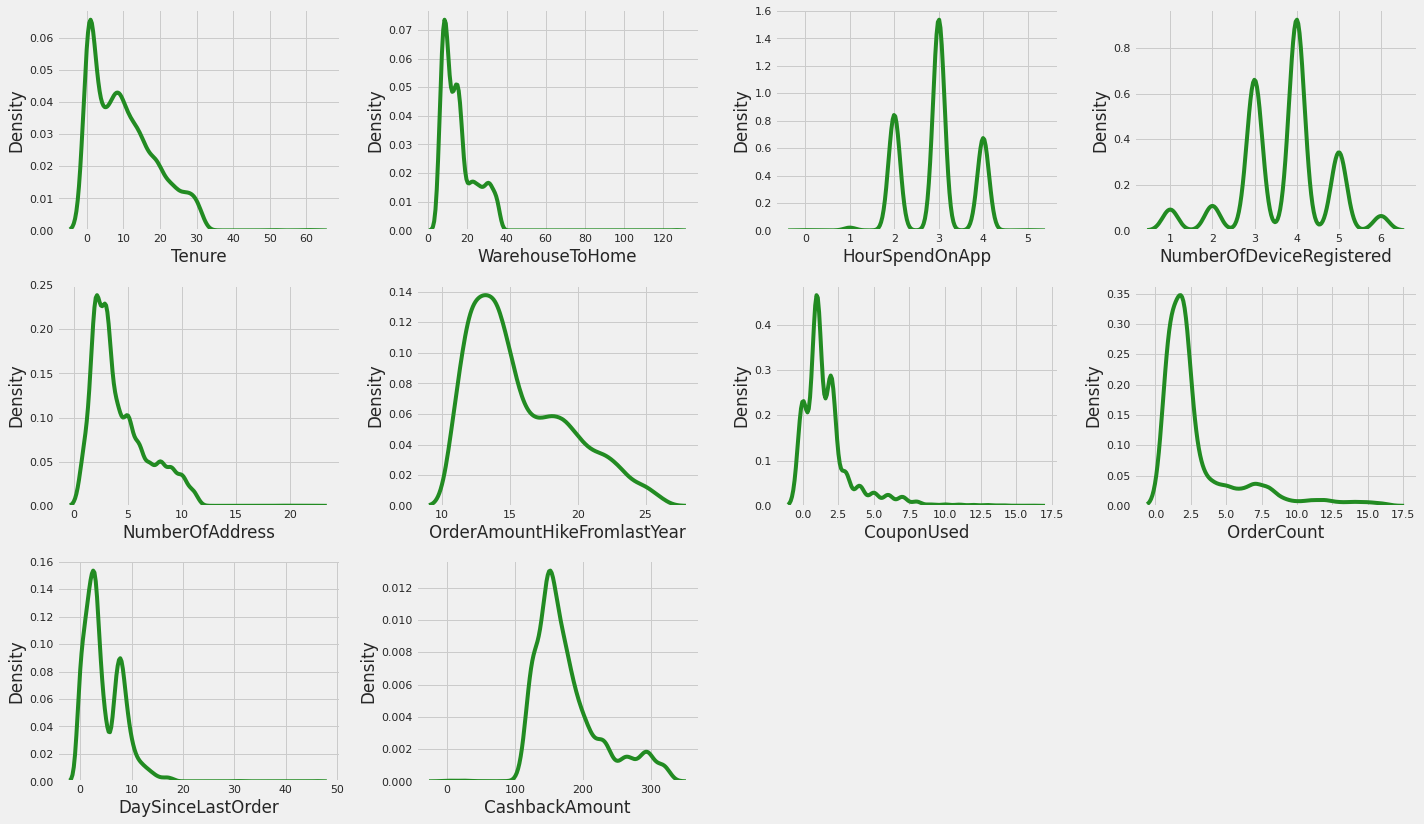

In [ ]:
features = kontinu_interval
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='forestgreen')
  plt.xlabel(features[i])
  plt.tight_layout()

Dapat dilihat dari visualisasi displot di atas : 

1. Kolom `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder` dan `CashbackAmount` mempunyai grafik yang skewed ke kanan (positively skew) dan pada saat nanti melakukan data preprocesing dapat melakukan feature transformation dengan menggunakan log transformation.

2. Kolom `NumberOfDeviceRegistered` menunjukan customer cenderung login lebih dari 1 device.

3. Kolom `HourSpendOnAPP` memiliki modus di 3 jam

### Individual Countplot (kategorikal_ordinal)

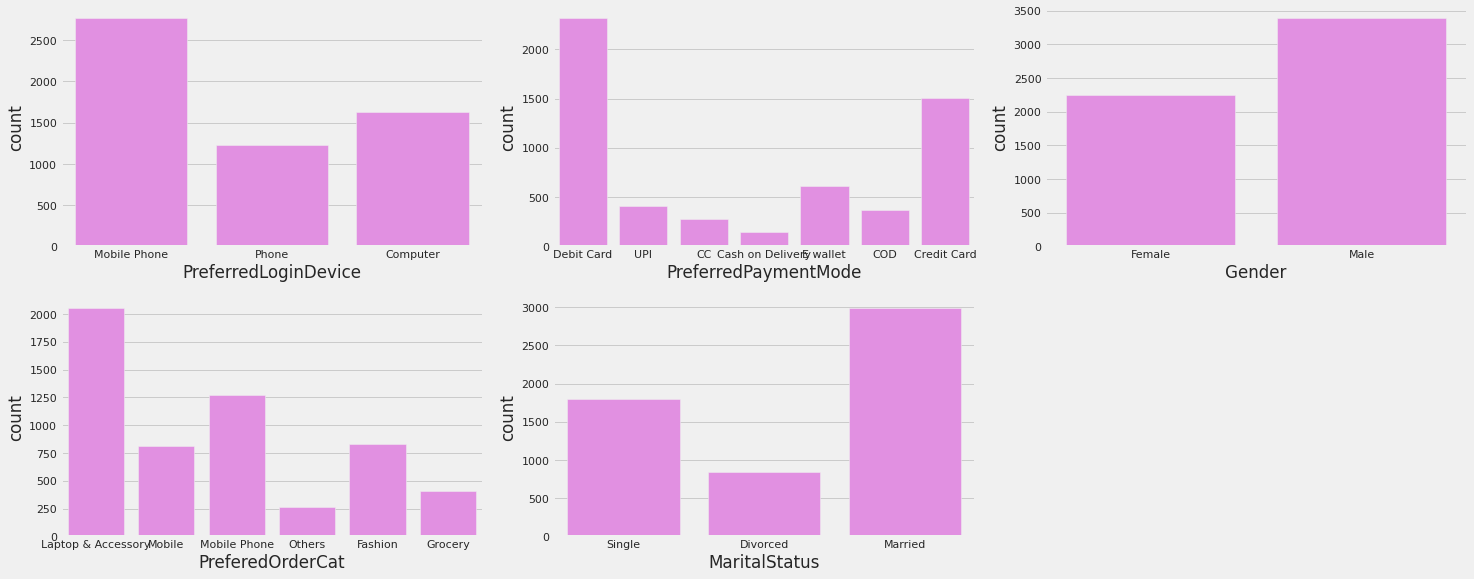

In [ ]:
features = kategorikal_ordinal
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[features[i]], color = 'violet')
  plt.tight_layout()

1. Kolom PrefferedLoginDevice mempunyai nilai yang mendominasi pada kategori Mobile Phone
2. Kolom PrefferedPaymentMode mempunyai nilai yang mendominasi pada 2 kategori yaitu Debit Card dan Credit Card
3. Kolom Gender mempunyai nilai yang mendominasi pada kategori Male
4. Kolom PreferedOrderCat mempunyai nilai yang mendominasi pada kategori Laptop & Accessory
5. Kolom MaritalStatus mempunyai nilai yang mendominast pada kategori Married

Saat nanti melakukan data preprocessing dapat melakukan feature encoding dengan menggunakan OHE (One Hot Encoding)

### Individual Countplot (kategorikal_numerikal)

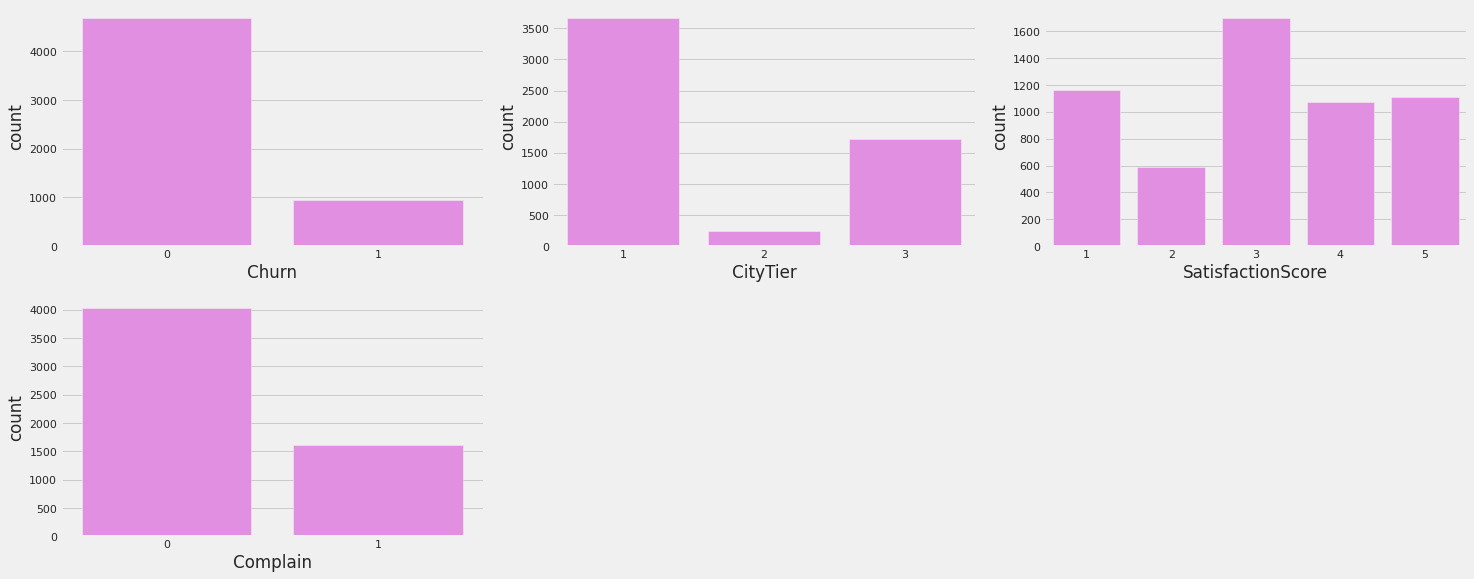

In [ ]:
features = kategorikal_nominal
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[features[i]], color = 'violet')
  plt.tight_layout()

1. Kolom `CityTier` menunjukan bahwa customer dengan katagori 1 mendominasi.
2. Kolom `SatisfactionScore` mempunyai nilai yang mendominasi pada angka 3.

## Multivariate Analysis

### Correlation Heatmap (Numeric)

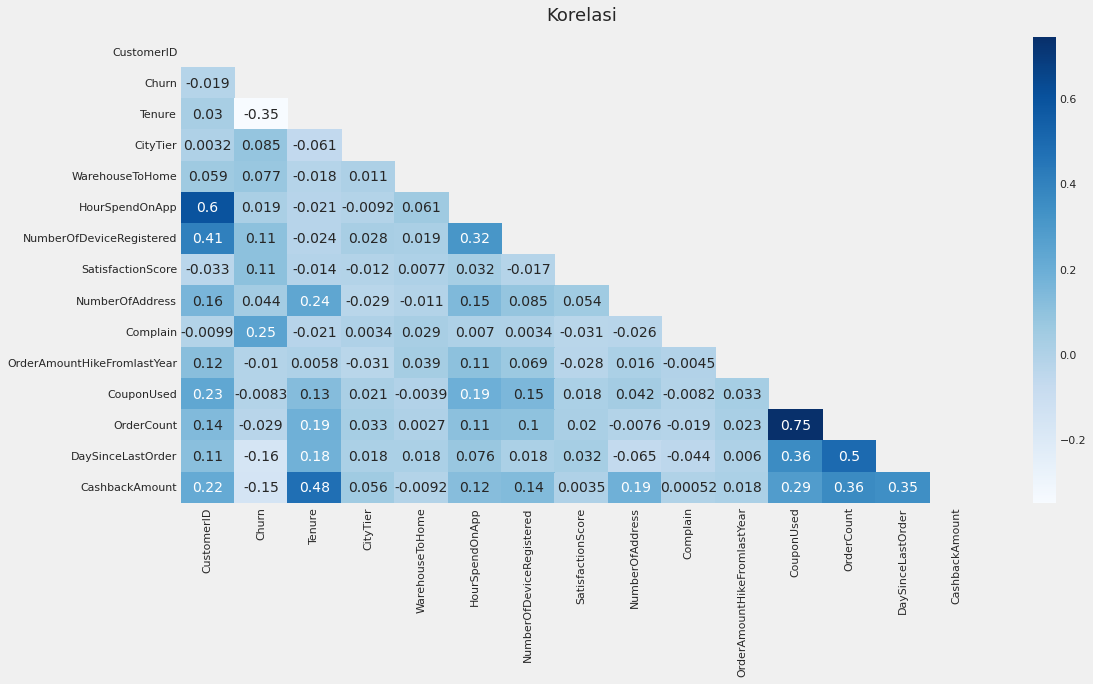

In [ ]:
# Correlation Analysis
plt.figure(figsize=(16, 8))

# Create mask for diagonal correlation plot
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# Plot the heatmap
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='Blues' )
heatmap.set_title('Korelasi', fontdict={'fontsize':18}, pad=16);

Dari Visualisasi Heatmap di atas, terlihat bahwa : 
1. Target (Churn) memiliki kolerasi positif dengan `CityTier`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `Complain`
2. Target (Churn) memiliki kolerasi negatif `Tenure`,  `DaySinceLastOrder`, dan `CashbackAmount`.
3. Target (Churn) dengan `HourSpendOnApp`,`NumberOfAddress`, `OrderAmoundHikeFromlastYear`, `CouponUsed`, `OrderCount` memiliki kolerasi sangat lemah ~0, ini menandakan bisa jadi fitur tersebut tidak potensial
4. `OrderCount` memiliki kolerasi cukup kuat dengan `CouponUsed`. Hal tersebut bisa dikatakan redundant

### Korelasi antar Target dan Fitur

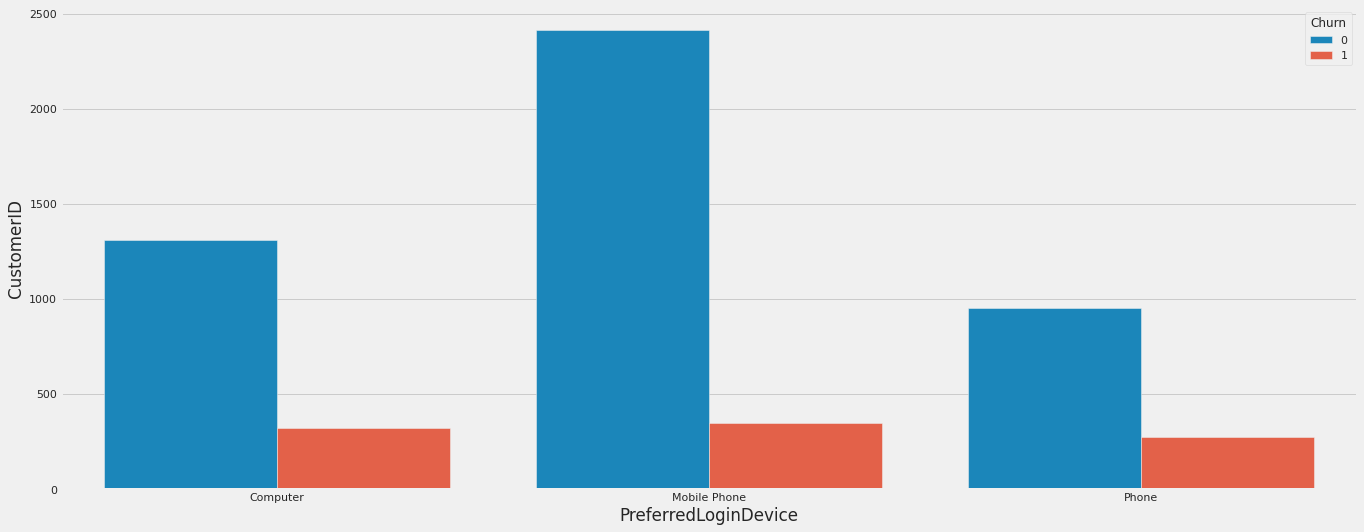

In [ ]:
df9=df.groupby(['PreferredLoginDevice','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferredLoginDevice', y ='CustomerID', hue='Churn', data=df9);

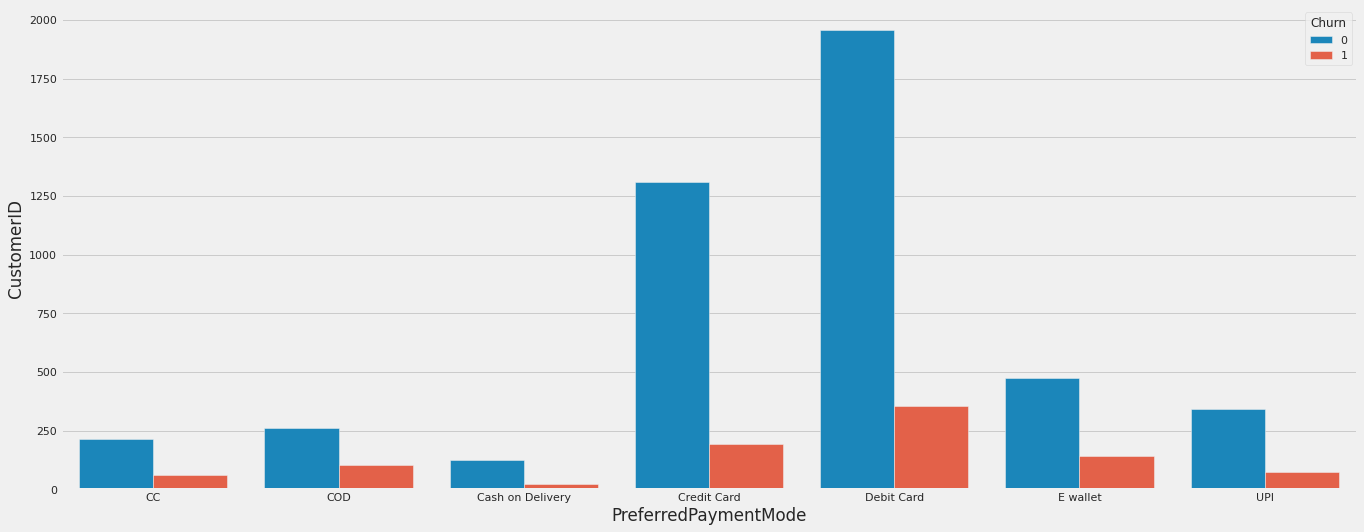

In [ ]:
df10=df.groupby(['PreferredPaymentMode','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferredPaymentMode', y ='CustomerID', hue='Churn', data=df10);

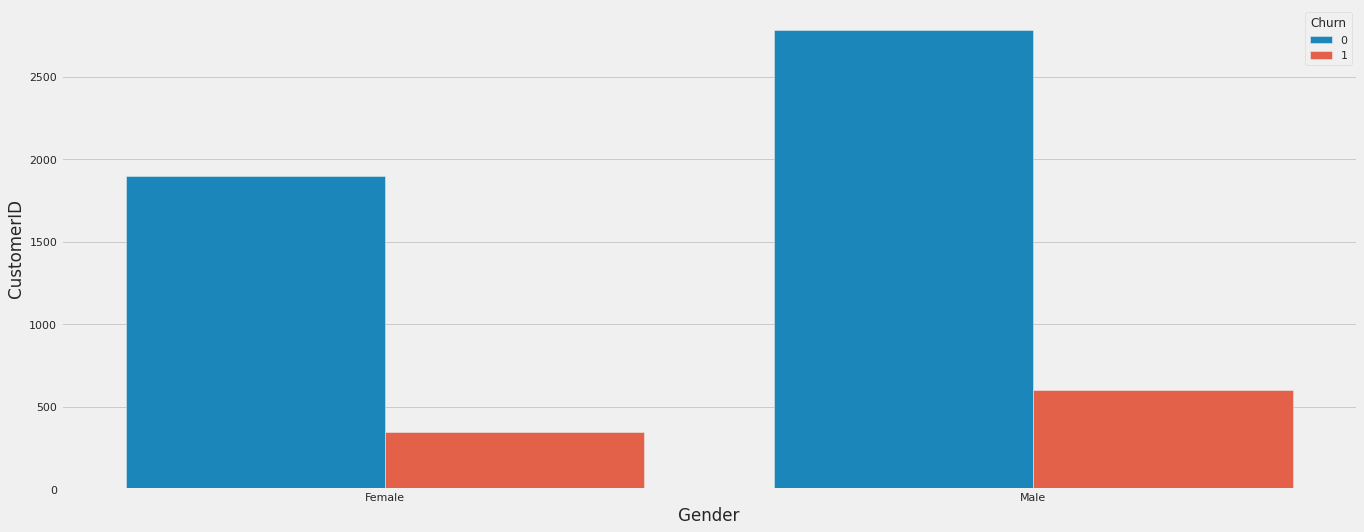

In [ ]:
df11=df.groupby(['Gender','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='Gender', y ='CustomerID', hue='Churn', data=df11);

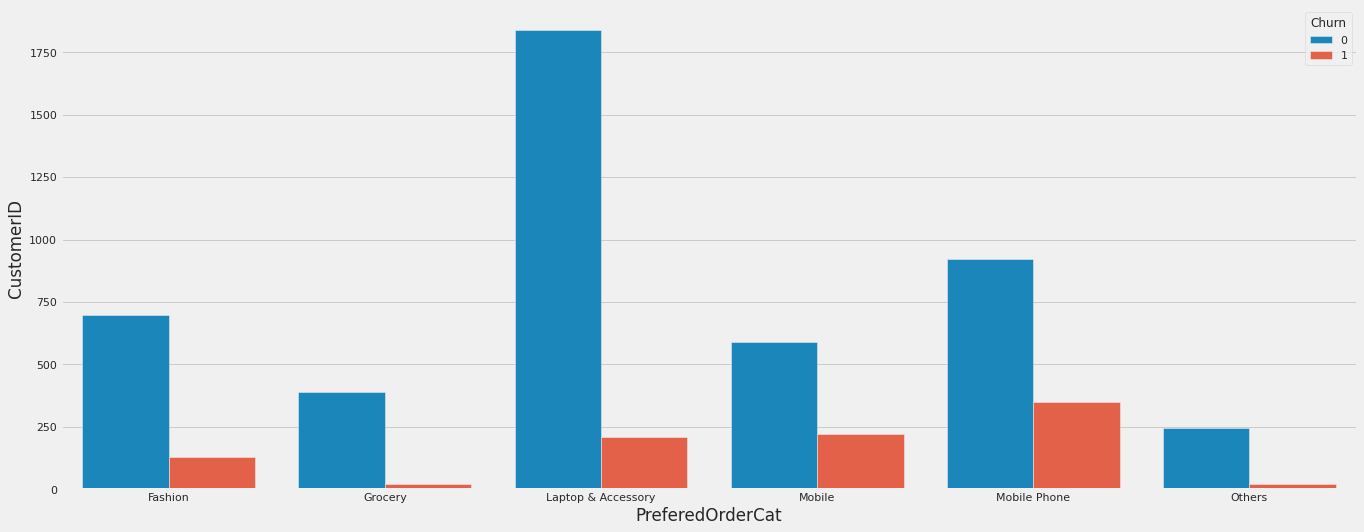

In [ ]:
df12=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferedOrderCat', y ='CustomerID', hue='Churn', data=df12);

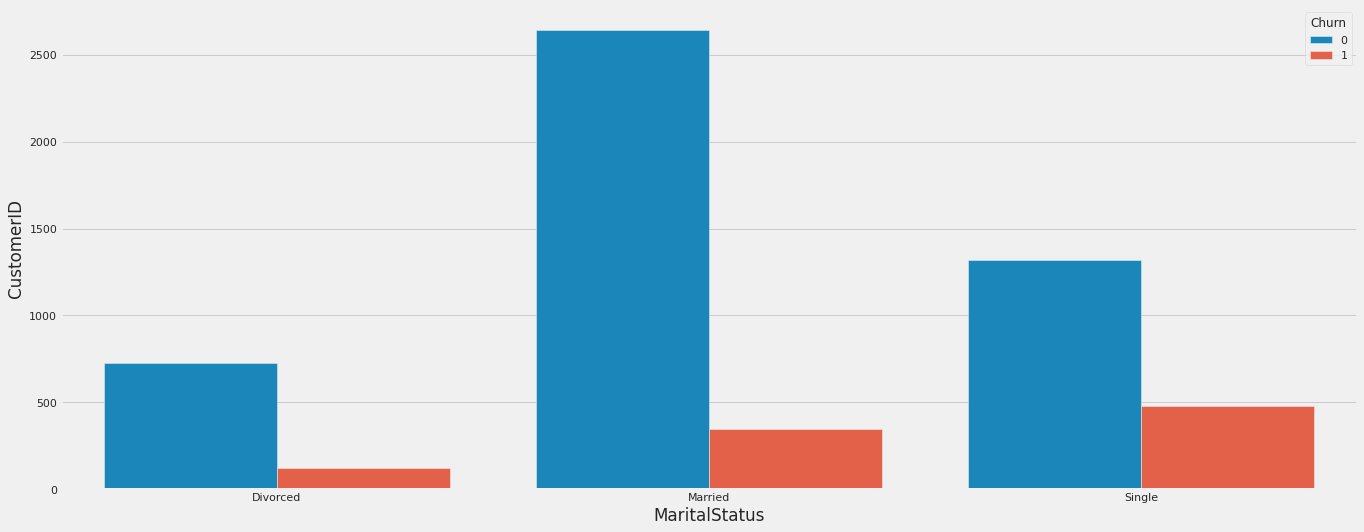

In [ ]:
df13=df.groupby(['MaritalStatus','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='MaritalStatus', y ='CustomerID', hue='Churn', data=df13);

Dari visualisasi diatas, terlihat bahwa : 
1. Pada Fitur PreferredLoginDevice, Computer dan Mobile Phone memiliki potensi churn paling tinggi.
2. Pada Fitur PreferredPaymentMode, Debit Card memiliki potensi Churn paling tinggi 
3. Pada Fitur Gender, Male memiliki potensi churn paling tinggi 
4. Pada Fitur PreferredOrderCat, Mobile Phone memiliki potensi churn paling tinggi
5. Pada Fitur MaritalStatus, Single memiliki potensi Churn paling tinggi

## Business Insight

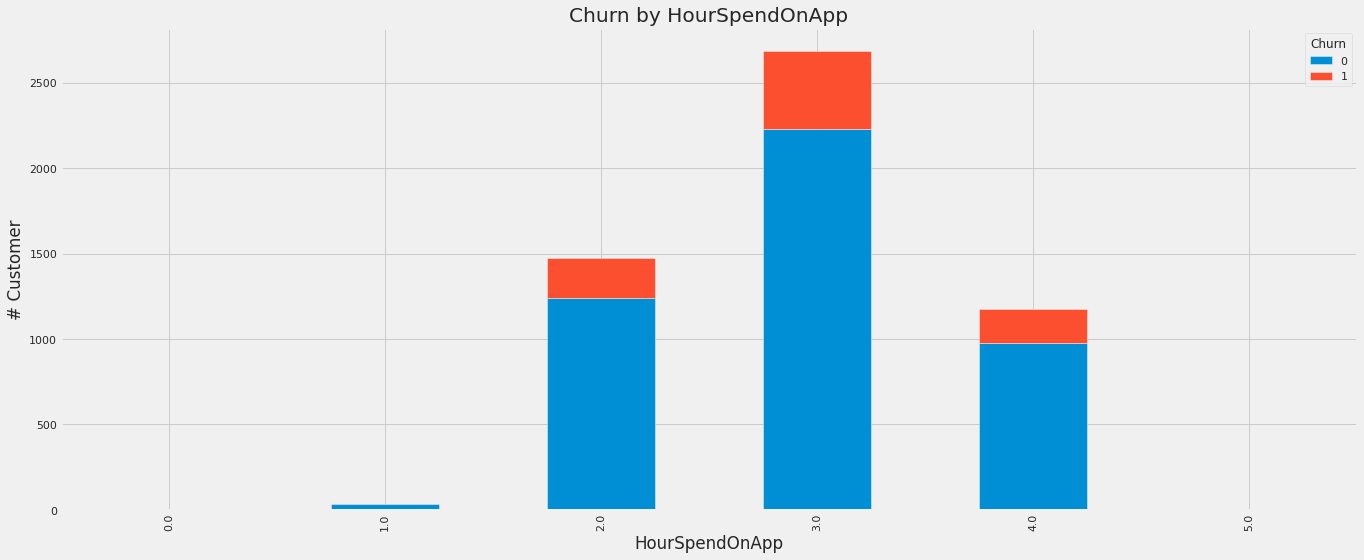

In [ ]:
HourxChurn = pd.crosstab(data["HourSpendOnApp"], data["Churn"])
HourxChurn.plot(kind = 'bar', stacked = 'true', title = "Churn by HourSpendOnApp")
plt.xlabel('HourSpendOnApp')
plt.ylabel('# Customer')
plt.show()

In [ ]:
df11_test = df.groupby(['HourSpendOnApp','Churn']).agg({'CustomerID':'nunique'}).reset_index()
df11_test

,HourSpendOnApp,Churn,CustomerID
0,0.0,0,3
1,1.0,0,35
2,2.0,0,1239
3,2.0,1,232
4,3.0,0,2227
5,3.0,1,460
6,4.0,0,978
7,4.0,1,198
8,5.0,0,3


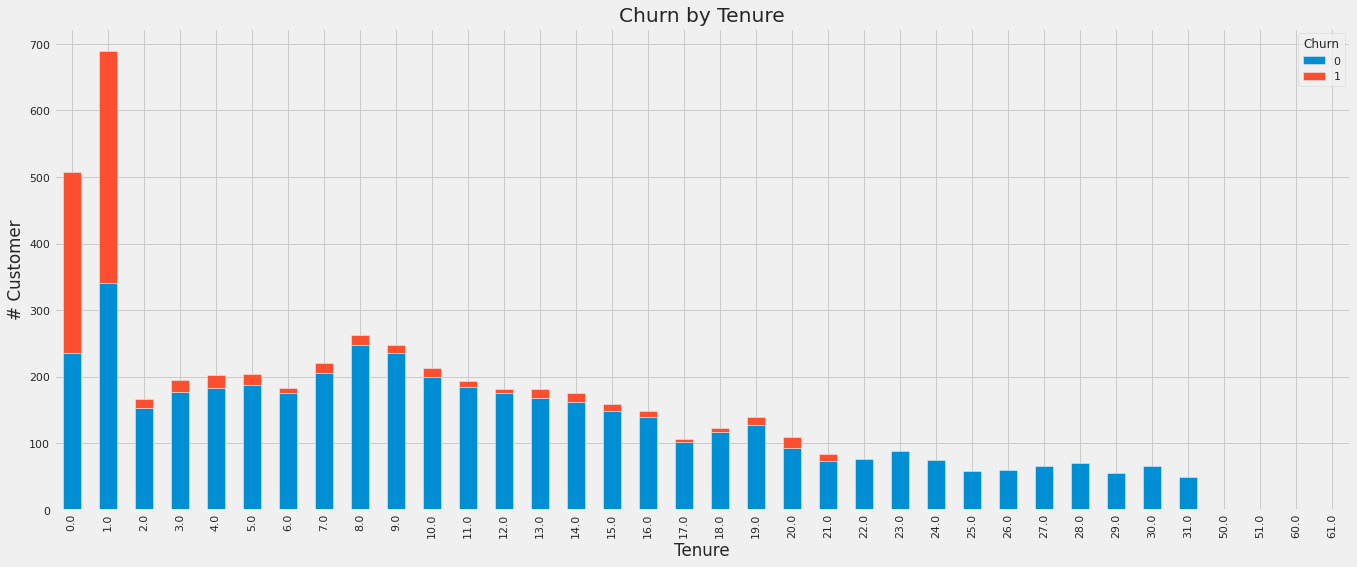

In [ ]:
int_churn_contingency = pd.crosstab(data["Tenure"], data["Churn"])
int_churn_contingency.plot(kind = 'bar', stacked = 'true', title = "Churn by Tenure")
int_churn_contingency
plt.xlabel('Tenure')
plt.ylabel('# Customer')
plt.show()

In [ ]:
int_churn_contingency

Churn,0,1
Tenure,,
0.0,236,272
1.0,341,349
2.0,153,14
3.0,177,18
4.0,183,20
5.0,188,16
6.0,175,8
7.0,205,16
8.0,247,16


### Business Insight 1. 

Terdapat kolerasi yang cukup tinggi antara customerID dengan HourSpendOnApp. Namun, antara Churn dengan HourSpendOnApp memiliki kolerasi yang cukup lemah (dibawah 0,05). Hal tersebut menandakan bahwa customer yang membuka App dengan waktu yang lama belum tentu akan menjadi pembeli pada App. Berbanding terbalik dengan Tenure yang memiliki kolerasi yang cukup kuat. Hal tersebut mengartikan bahwa Tim Marketing bisa memfokuskan kepada customer yang sudah lama menggunakan App dalam pemberian promo agar bisa mempertahankan customer lama (bisa dikatakan loyal customer). Karena, customer baru bisa dikatakan sebagai One Time Buyer. 

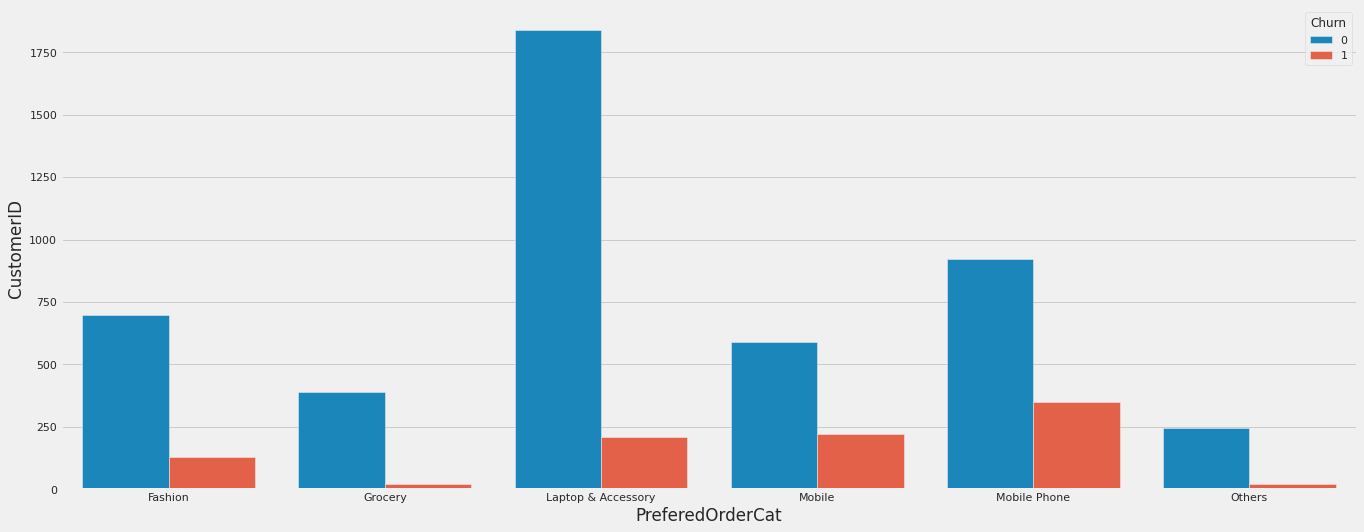

In [ ]:
df12=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferedOrderCat', y ='CustomerID', hue='Churn', data=df12);

In [ ]:
df12_test = df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
df12_test

,PreferedOrderCat,Churn,CustomerID
0,Fashion,0,698
1,Fashion,1,128
2,Grocery,0,390
3,Grocery,1,20
4,Laptop & Accessory,0,1840
5,Laptop & Accessory,1,210
6,Mobile,0,589
7,Mobile,1,220
8,Mobile Phone,0,921
9,Mobile Phone,1,350


### Business Insight 2. 

Dalam pemberian promo, Tim Marketing harus tepat sasaran dengan menyesuaikan dengan behavior (kemampuan belanja) customer. Salah satu contohnya bisa melihat dari PrefferedOrderCat. Misal customer yang memiliki kebiasaan untuk membeli produk Fashion, bisa diberikan promo yang berhubungan dengan produk Fashion. Sedangkan untuk customer yang memiliki kebiasaan untuk membeli produk Laptop & Accessory bisa diberikan promo yang berhubungan dengan produk Laptop & Accessory. Hal tersebut dapat mengurangi kemungkinan untuk Churn

In [ ]:
df14_test = df.groupby(['Complain','Churn']).agg({'CustomerID':'nunique'}).reset_index()
df14_test

,Complain,Churn,CustomerID
0,0,0,3586
1,0,1,440
2,1,0,1096
3,1,1,508


### Business Insight 3.
Melihat dari correlation heatmap, tingkat complain masih cenderung tinggi. oleh karena itu team customer Service harus memantau komplain pelanggan secara berkala agar segera menindak lanjuti saat terjadi jika keluhan pelanggan di tangani secara, kemungkinan besar customer akan tetap loyal kepada aplikasi Bukapedia. Selain itu komplain pelanggan juga dapat menjadi peluang untuk meningkatkan produk dan layanan dan dapat meningkatkan SatisfactionRate.

# Stage 2 - Skenario 1

##Melakukan Split-Data

In [ ]:
#split dataset
x = df.drop(columns=['CustomerID','Churn'])
y = df['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##Pre-Processing

###Label_Encoding

In [ ]:
def label_encoding(x_train,
                   x_test):
  ordinal_encoder = OrdinalEncoder(encoding_method='arbitrary',
variables='Gender')
  ordinal_encoder.fit(x_train)
  x_train = ordinal_encoder.transform(x_train)
  x_test = ordinal_encoder.transform(x_test)
  return x_train, x_test

In [ ]:
x_train, x_test = label_encoding(x_train,x_test)

In [ ]:
x_train

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4478,1.0,Mobile Phone,1,12.0,Debit Card,0,3.0,4,Mobile Phone,4,Single,3,1,13.0,1.0,2.0,3.0,149.78
3685,17.0,Mobile Phone,1,13.0,Credit Card,0,4.0,5,Laptop & Accessory,3,Single,3,1,15.0,2.0,2.0,9.0,165.81
731,0.0,Phone,1,9.0,Debit Card,1,NaN,4,Mobile,3,Single,2,0,12.0,0.0,1.0,2.0,130.33
291,NaN,Computer,1,8.0,Debit Card,1,2.0,3,Mobile Phone,2,Divorced,2,1,23.0,1.0,1.0,0.0,117.02
184,4.0,Phone,1,11.0,COD,1,2.0,3,Mobile Phone,2,Divorced,1,1,12.0,0.0,1.0,3.0,148.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,Phone,1,27.0,Debit Card,1,4.0,4,Laptop & Accessory,3,Single,2,0,15.0,2.0,2.0,3.0,147.72
5191,10.0,Mobile Phone,3,16.0,E wallet,1,3.0,4,Fashion,1,Married,6,0,12.0,5.0,5.0,NaN,225.96
5226,7.0,Mobile Phone,1,11.0,Credit Card,0,3.0,5,Mobile Phone,4,Married,10,0,12.0,2.0,2.0,3.0,163.38
5390,1.0,Mobile Phone,1,36.0,Credit Card,1,4.0,4,Mobile Phone,5,Married,3,0,14.0,2.0,2.0,3.0,164.07


In [ ]:
x_test

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4331,1.0,Computer,3,7.0,COD,0,4.0,6,Mobile Phone,5,Single,2,0,22.0,2.0,2.0,1.0,148.25
1988,15.0,Mobile Phone,1,9.0,Debit Card,0,3.0,1,Laptop & Accessory,1,Married,3,1,13.0,1.0,1.0,3.0,152.31
3443,13.0,Computer,1,29.0,Credit Card,0,3.0,4,Fashion,5,Single,3,1,14.0,2.0,NaN,9.0,233.80
4559,5.0,Phone,1,7.0,Debit Card,1,4.0,5,Mobile Phone,5,Married,3,0,13.0,4.0,4.0,3.0,147.18
4898,13.0,Mobile Phone,1,7.0,Debit Card,0,4.0,5,Grocery,1,Married,3,0,17.0,10.0,NaN,9.0,252.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,16.0,Computer,1,16.0,Credit Card,0,4.0,4,Mobile Phone,1,Single,3,0,14.0,5.0,6.0,9.0,161.73
833,7.0,Mobile Phone,1,15.0,Debit Card,1,2.0,3,Fashion,2,Married,1,0,11.0,1.0,1.0,6.0,185.00
4441,16.0,Mobile Phone,3,7.0,Debit Card,1,2.0,4,Laptop & Accessory,3,Married,3,0,26.0,7.0,12.0,7.0,174.07
4490,17.0,Computer,1,17.0,Debit Card,0,3.0,5,Laptop & Accessory,3,Married,3,0,12.0,2.0,2.0,1.0,177.57


###Melakukan One Hot Encoding

In [ ]:
def label_ohe(x_train, 
              x_test):
  cat_features = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
  ohe_encoder = OneHotEncoder(variables=cat_features)
  ohe_encoder.fit(x_train)
  x_train = ohe_encoder.transform(x_train)
  x_test = ohe_encoder.transform(x_test)

  return x_train, x_test

In [ ]:
x_train , x_test=label_ohe(x_train, x_test)

In [ ]:
#hasil lable endcoding
x_train

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_CC,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married
4478,1.0,1,12.0,0,3.0,4,4,3,1,13.0,...,0,1,0,0,0,0,0,1,0,0
3685,17.0,1,13.0,0,4.0,5,3,3,1,15.0,...,0,0,1,0,0,0,0,1,0,0
731,0.0,1,9.0,1,NaN,4,3,2,0,12.0,...,0,0,0,1,0,0,0,1,0,0
291,NaN,1,8.0,1,2.0,3,2,2,1,23.0,...,0,1,0,0,0,0,0,0,1,0
184,4.0,1,11.0,1,2.0,3,2,1,1,12.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,1,27.0,1,4.0,4,3,2,0,15.0,...,0,0,1,0,0,0,0,1,0,0
5191,10.0,3,16.0,1,3.0,4,1,6,0,12.0,...,0,0,0,0,1,0,0,0,0,1
5226,7.0,1,11.0,0,3.0,5,4,10,0,12.0,...,0,1,0,0,0,0,0,0,0,1
5390,1.0,1,36.0,1,4.0,4,5,3,0,14.0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
x_test

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_CC,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married
4331,1.0,3,7.0,0,4.0,6,5,2,0,22.0,...,0,1,0,0,0,0,0,1,0,0
1988,15.0,1,9.0,0,3.0,1,1,3,1,13.0,...,0,0,1,0,0,0,0,0,0,1
3443,13.0,1,29.0,0,3.0,4,5,3,1,14.0,...,0,0,0,0,1,0,0,1,0,0
4559,5.0,1,7.0,1,4.0,5,5,3,0,13.0,...,0,1,0,0,0,0,0,0,0,1
4898,13.0,1,7.0,0,4.0,5,1,3,0,17.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,16.0,1,16.0,0,4.0,4,1,3,0,14.0,...,0,1,0,0,0,0,0,1,0,0
833,7.0,1,15.0,1,2.0,3,2,1,0,11.0,...,0,0,0,0,1,0,0,0,0,1
4441,16.0,3,7.0,1,2.0,4,3,3,0,26.0,...,0,0,1,0,0,0,0,0,0,1
4490,17.0,1,17.0,0,3.0,5,3,3,0,12.0,...,0,0,1,0,0,0,0,0,0,1


### Handling Missing Value dan Imputasi

In [ ]:
cat_features = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
cont_features = ['HourSpendOnApp']

In [ ]:
def imputation (x_train, 
                x_test,
                cont_features,
                cat_features,
                cont_strategy = 'median',
                cat_strategy = 'most_frequent'
                ):

#initializa object imputer
  imputerCat = SimpleImputer(missing_values=np.nan, strategy= cat_strategy)
  imputerCont = SimpleImputer(missing_values=np.nan, strategy= cont_strategy)

#fit to data train
  imputerCont.fit(x_train[cont_features])
  imputerCat.fit(x_train[cat_features])

#transfrom to data train
  x_train[cont_features] = imputerCont.transform(x_train[cont_features])
  x_train[cat_features] = imputerCat.transform(x_train[cat_features])
  x_test[cont_features] = imputerCont.transform(x_test[cont_features])
  x_test[cat_features] = imputerCat.transform(x_test[cat_features])

  return x_train, x_test

In [ ]:
x_train , x_test = imputation(x_train, x_test,cont_features, cat_features)

In [ ]:
x_train

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_CC,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married
4478,1.0,1,12.0,0,3.0,4,4,3,1,13.0,...,0,1,0,0,0,0,0,1,0,0
3685,17.0,1,13.0,0,4.0,5,3,3,1,15.0,...,0,0,1,0,0,0,0,1,0,0
731,0.0,1,9.0,1,3.0,4,3,2,0,12.0,...,0,0,0,1,0,0,0,1,0,0
291,1.0,1,8.0,1,2.0,3,2,2,1,23.0,...,0,1,0,0,0,0,0,0,1,0
184,4.0,1,11.0,1,2.0,3,2,1,1,12.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,1,27.0,1,4.0,4,3,2,0,15.0,...,0,0,1,0,0,0,0,1,0,0
5191,10.0,3,16.0,1,3.0,4,1,6,0,12.0,...,0,0,0,0,1,0,0,0,0,1
5226,7.0,1,11.0,0,3.0,5,4,10,0,12.0,...,0,1,0,0,0,0,0,0,0,1
5390,1.0,1,36.0,1,4.0,4,5,3,0,14.0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
x_test

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_CC,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married
4331,1.0,3,7.0,0,4.0,6,5,2,0,22.0,...,0,1,0,0,0,0,0,1,0,0
1988,15.0,1,9.0,0,3.0,1,1,3,1,13.0,...,0,0,1,0,0,0,0,0,0,1
3443,13.0,1,29.0,0,3.0,4,5,3,1,14.0,...,0,0,0,0,1,0,0,1,0,0
4559,5.0,1,7.0,1,4.0,5,5,3,0,13.0,...,0,1,0,0,0,0,0,0,0,1
4898,13.0,1,7.0,0,4.0,5,1,3,0,17.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,16.0,1,16.0,0,4.0,4,1,3,0,14.0,...,0,1,0,0,0,0,0,1,0,0
833,7.0,1,15.0,1,2.0,3,2,1,0,11.0,...,0,0,0,0,1,0,0,0,0,1
4441,16.0,3,7.0,1,2.0,4,3,3,0,26.0,...,0,0,1,0,0,0,0,0,0,1
4490,17.0,1,17.0,0,3.0,5,3,3,0,12.0,...,0,0,1,0,0,0,0,0,0,1


##Prediction dan Test Model

### Function Modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def get_metrics(y_pred, y_act, model_name):
  recall =  recall_score(y_act, y_pred)
  precision = precision_score(y_act, y_pred)
  roc_auc = roc_auc_score(y_act, y_pred)
  f1 = f1_score(y_act, y_pred)
  accuracy = balanced_accuracy_score(y_act, y_pred)

  metrics_result = dict(model_name=model_name, 
                        recall=recall, 
                        precision=precision, 
                        roc_auc=roc_auc, 
                        f1=f1,
                        accuracy=accuracy)
  
  return metrics_result


def prediction(x_train, y_train, x_test, y_test, clf, model_name='decision tree'):
  
  clf = clf
  clf.fit(x_train, y_train)
  y_test_pred = clf.predict(x_test)
  y_train_pred = clf.predict(x_train)


  result = dict()
  test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
  train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

  result['test'] = test_result
  result['train'] = train_result
  result['y_test'] = y_test
  result['y_test_pred'] = y_test_pred
  result['y_train'] = y_train
  result['y_train_pred'] = y_train_pred
  result['clf'] = clf
  result['x_train'] = x_train
  result['x_test'] = x_test

  del clf

  return result
  
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')


### Pred evaluation

In [ ]:
model_1_result = prediction(x_train, y_train, x_test, y_test, tree.DecisionTreeClassifier(), model_name='decision tree')
model_2_result = prediction(x_train, y_train, x_test, y_test, xgb.XGBClassifier(random_state=42), model_name='xgboost')
model_3_result = prediction(x_train, y_train, x_test, y_test, cb.CatBoostClassifier(random_state=42, logging_level='Silent'), model_name='catboost')
model_4_result = prediction(x_train, y_train, x_test, y_test, LogisticRegression(), model_name='logistic regression')
model_5_result = prediction(x_train, y_train, x_test, y_test, RandomForestClassifier(random_state=42), model_name='random forest')
model_6_result = prediction(x_train, y_train, x_test, y_test, KNeighborsClassifier(), model_name='kNN')
model_7_result = prediction(x_train, y_train, x_test, y_test, AdaBoostClassifier(random_state=42), model_name='adaboost')

## Result Modeling

In [ ]:
pd.DataFrame([model_1_result['train'], 
              model_2_result['train'], 
              model_3_result['train'], 
              model_4_result['train'], 
              model_5_result['train'],
              model_6_result['train'], 
              model_7_result['train']])

,model_name,recall,precision,roc_auc,f1,accuracy
0,decision tree,1.000000,1.000000,1.000000,1.000000,1.000000
1,xgboost,0.665793,0.886562,0.824209,0.760479,0.824209
2,catboost,0.959371,0.997275,0.979418,0.977956,0.979418
3,logistic regression,0.519004,0.722628,0.739187,0.604119,0.739187
4,random forest,1.000000,1.000000,1.000000,1.000000,1.000000
5,kNN,0.557012,0.792910,0.763670,0.654349,0.763670
6,adaboost,0.589777,0.756303,0.775509,0.662739,0.775509


In [ ]:
pd.DataFrame([model_1_result['test'], 
              model_2_result['test'], 
              model_3_result['test'], 
              model_4_result['test'], 
              model_5_result['test'],
              model_6_result['test'], 
              model_7_result['test']])

,model_name,recall,precision,roc_auc,f1,accuracy
0,decision tree,0.886486,0.911111,0.934742,0.898630,0.934742
1,xgboost,0.627027,0.852941,0.802887,0.722741,0.802887
2,catboost,0.816216,0.974194,0.905983,0.888235,0.905983
3,logistic regression,0.551351,0.796875,0.761861,0.651757,0.761861
4,random forest,0.827027,1.000000,0.913514,0.905325,0.913514
5,kNN,0.400000,0.627119,0.676621,0.488449,0.676621
6,adaboost,0.616216,0.808511,0.793762,0.699387,0.793762


In [ ]:
print(classification_report(model_1_result['y_test'], model_5_result['y_test_pred']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       941
           1       1.00      0.83      0.91       185

    accuracy                           0.97      1126
   macro avg       0.98      0.91      0.94      1126
weighted avg       0.97      0.97      0.97      1126



##Hyperparameter Tuning

### Hyperparameter LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print('Train score: ' + str(model.score(x_train, y_train))) #accuracy
print('Test score:' + str(model.score(x_test, y_test))) #accuracy

Train score: 0.8847690941385435
Test score:0.9031971580817052


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
logres_hyper = prediction(x_train, y_train, x_test, y_test, model, model_name='logistic regression_hyperparam')

In [ ]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.002


In [ ]:
print('Train score: ' + str(model.score(x_train, y_train))) #recall
print('Test score: ' + str(model.score(x_test, y_test))) #recall

Train score: 0.2699868938401048
Test score: 0.24864864864864866


###Hyperparameter KKN

In [ ]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
print('Train score: ' + str(model.score(x_train, y_train))) #recall
print('Test score:' + str(model.score(x_test, y_test))) #recall

Train score: 0.9003108348134992
Test score:0.8623445825932504


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
kkn_hyper = prediction(x_train, y_train, x_test, y_test, model, model_name='kNN_hyperparam')

In [ ]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 5
Best p: 1
Best algorithm: ball_tree


In [ ]:
print('Train score: ' + str(model.score(x_train, y_train))) #recall
print('Test score: ' + str(model.score(x_test, y_test))) #recall

Train score: 0.5871559633027523
Test score: 0.4486486486486487


### Hyperparameter DecisionTreeClassifier

In [ ]:
model = tree.DecisionTreeClassifier() 
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print('Train score: ' + str(model.score(x_train, y_train))) #recall
print('Test score:' + str(model.score(x_test, y_test))) #recall

Train score: 1.0
Test score:0.9706927175843695


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = tree.DecisionTreeClassifier()
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(x_train, y_train)

# Predict & Evaluation
dt_hyper = prediction(x_train, y_train, x_test, y_test, model, model_name='decision tree_hyperparam')
dt_hyper

{'clf': RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                    param_distributions={'max_depth': [1, 4, 8, 12, 16, 19, 23,
                                                       27, 31, 34, 38, 42, 46,
                                                       49, 53, 57, 61, 64, 68,
                                                       72, 76, 79, 83, 87, 91,
                                                       94, 98, 102, 106, 110],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 2, 4, 10, 20,
                                                              50],
                                         'min_samples_split': [2, 5, 10, 100]},
                    random_state=42, scoring='recall'),
 'test': {'accuracy': 0.8058189964672431,
  'f1': 0.6931818181818181,
  'model_name': 'decision tree_hyperparam',
  'precision': 0.7305389221556886,
  'recall': 0.659459459459459

In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(x_train, y_train))) #recall
print('Test score: ' + str(model.score(x_test, y_test))) #recall

Train score: 0.7916120576671035
Test score: 0.6594594594594595


### Hyperparameter Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print('Train score: ' + str(rf.score(x_train, y_train))) #recall
print('Test score: ' + str(rf.score(x_test, y_test))) #recall

Train score: 1.0
Test score: 0.9715808170515098


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')

# Predict & Evaluation
rf_hyper = prediction(x_train, y_train, x_test, y_test, rf_tuned, model_name='random forest_hyperparam')
rf_hyper

{'clf': RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                    param_distributions={'bootstrap': [True],
                                         'criterion': ['gini', 'entropy'],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110],
                                         'max_features': ['auto', 'sqrt',
                                                          'log2'],
                                         'min_samples_leaf': [1, 3, 5, 7, 10],
                                         'min_samples_split': [2, 4, 6, 8, 10],
                                         'n_estimators': [100, 200, 300, 400,
                                                          500, 600, 700, 800,
                                                          900, 1000, 1100, 1200,
                                                          1300, 1400, 1500, 1600,
   

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [ ]:
print('Train score: ' + str(rf_tuned.score(x_train, y_train))) #recall
print('Test score: ' + str(rf_tuned.score(x_test, y_test))) #recall

Train score: 0.9960681520314548
Test score: 0.7945945945945946


### Hyperparameter AdaBoost

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train,y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
print('Train score: ' + str(ab.score(x_train, y_train))) #recall
print('Test score: ' + str(ab.score(x_test, y_test))) #recall

Train score: 0.8983126110124334
Test score: 0.9129662522202486


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')

# Predict & Evaluation
ad_hyper = prediction(x_train, y_train, x_test, y_test, ab_tuned, model_name='adaboost_hyperparam')

In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1700
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R


In [ ]:
print('Train score: ' + str(ab_tuned.score(x_train, y_train))) #recall
print('Test score: ' + str(ab_tuned.score(x_test, y_test))) #recall

Train score: 0.5950196592398427
Test score: 0.6216216216216216


### Hyperparameter CatBoost

In [ ]:
cat = cb.CatBoostClassifier(random_state=42, logging_level='Silent')
cat.fit(x_train,y_train)

In [ ]:
print('Train score: ' + str(cat.score(x_train, y_train))) #recall
print('Test score: ' + str(cat.score(x_test, y_test))) #recall

Train score: 0.9926731793960923
Test score: 0.9662522202486679


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)]
                      )

# Init model
cat = cb.CatBoostClassifier(random_state=42,logging_level='Silent')
cat_tuned = RandomizedSearchCV(cat, hyperparameters, random_state=42, cv=5, scoring='recall')

# Predict & Evaluation
cat_hyper = prediction(x_train, y_train, x_test, y_test, cat_tuned, model_name='cat boost_hyperparam')

In [ ]:
show_best_hyperparameter(cat_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1000
Best learning_rate: 0.08436842105263158


In [ ]:
print('Train score: ' + str(cat_tuned.score(x_train, y_train))) #recall
print('Test score: ' + str(cat_tuned.score(x_test, y_test))) #recall

Train score: 1.0
Test score: 0.9351351351351351


### Hyperparameter XGBOOST

In [ ]:
xg = xgb.XGBClassifier(random_state=42)
xg.fit(x_train, y_train)

XGBClassifier(random_state=42)

In [ ]:
print('Train score: ' + str(xg.score(x_train, y_train))) #recall
print('Test score: ' + str(xg.score(x_test, y_test))) #recall

Train score: 0.9289520426287744
Test score: 0.9209591474245116


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = xgb.XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')

# Predict & Evaluation
xg_hyper = prediction(x_train, y_train, x_test, y_test, xg_tuned, model_name='xgboost_hyperparam')

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 110
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


In [ ]:
print('Train score: ' + str(xg_tuned.score(x_train, y_train))) #recall
print('Test score: ' + str(xg_tuned.score(x_test, y_test))) #recall

Train score: 0.9986893840104849
Test score: 0.8972972972972973


## Result Hyperparameter modeling

In [ ]:
pd.DataFrame([logres_hyper['train'], 
              kkn_hyper['train'], 
              dt_hyper['train'], 
              rf_hyper['train'], 
              ad_hyper['train'],
              cat_hyper['train'],
              xg_hyper['train']
              ])

,model_name,recall,precision,roc_auc,f1,accuracy
0,logistic regression_hyperparam,0.269987,0.792308,0.627776,0.402737,0.627776
1,kNN_hyperparam,0.587156,0.825046,0.780881,0.686064,0.780881
2,decision tree_hyperparam,0.791612,0.889543,0.885782,0.837725,0.885782
3,random forest_hyperparam,0.996068,1.000000,0.998034,0.998030,0.998034
4,adaboost_hyperparam,0.595020,0.769492,0.779333,0.671101,0.779333
5,cat boost_hyperparam,1.000000,1.000000,1.000000,1.000000,1.000000
6,xgboost_hyperparam,0.998689,1.000000,0.999345,0.999344,0.999345


In [ ]:
pd.DataFrame([logres_hyper['test'], 
              kkn_hyper['test'], 
              dt_hyper['test'], 
              rf_hyper['test'], 
              ad_hyper['test'],
              cat_hyper['test'],
              xg_hyper['test']
              ])

,model_name,recall,precision,roc_auc,f1,accuracy
0,logistic regression_hyperparam,0.248649,0.836364,0.619542,0.383333,0.619542
1,kNN_hyperparam,0.448649,0.697479,0.705196,0.546053,0.705196
2,decision tree_hyperparam,0.659459,0.730539,0.805819,0.693182,0.805819
3,random forest_hyperparam,0.794595,1.000000,0.897297,0.885542,0.897297
4,adaboost_hyperparam,0.621622,0.827338,0.798058,0.709877,0.798058
5,cat boost_hyperparam,0.935135,0.994253,0.967036,0.963788,0.967036
6,xgboost_hyperparam,0.897297,0.988095,0.947586,0.940510,0.947586


Dari hasil tersebut model Catboost dengan hyperparameter merupakan model terbaik dengan train 100% dan test 93% 

##Feature Importance

In [ ]:
# model interpretation CatBoost

explainer = shap.Explainer(cat_hyper['clf'].predict, cat_hyper['x_test'])
shap_values_cat = explainer(cat_hyper['x_test'])

Permutation explainer: 1127it [01:56,  9.00it/s]                          


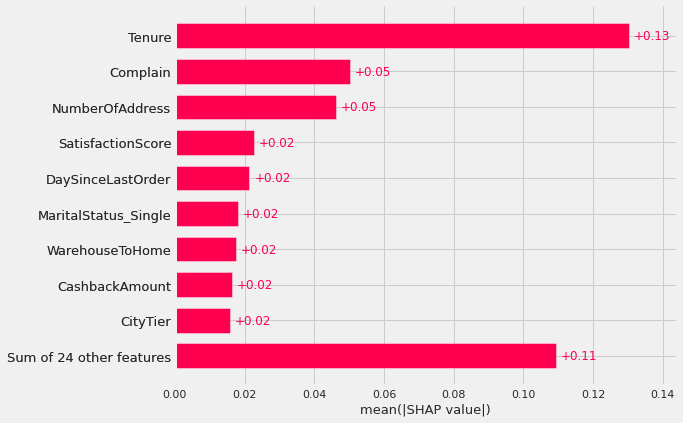

In [ ]:
shap.plots.bar(shap_values_cat)

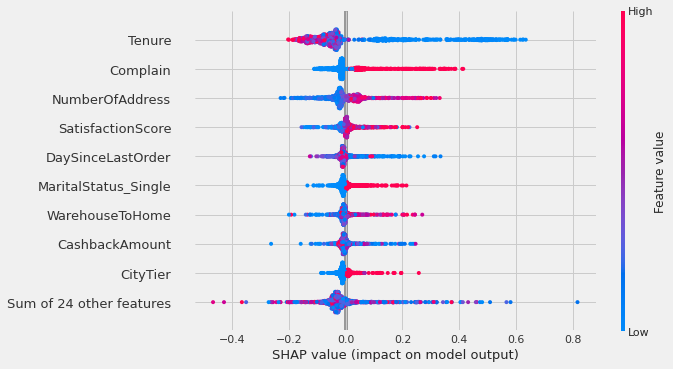

In [ ]:
shap.plots.beeswarm(shap_values_cat)

## Confusion Matrix

In [ ]:
# Catboost
y_pred = cat_tuned.predict(x_test)
y_pred_train = cat_tuned.predict(x_train)

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[940   1]
 [ 12 173]]


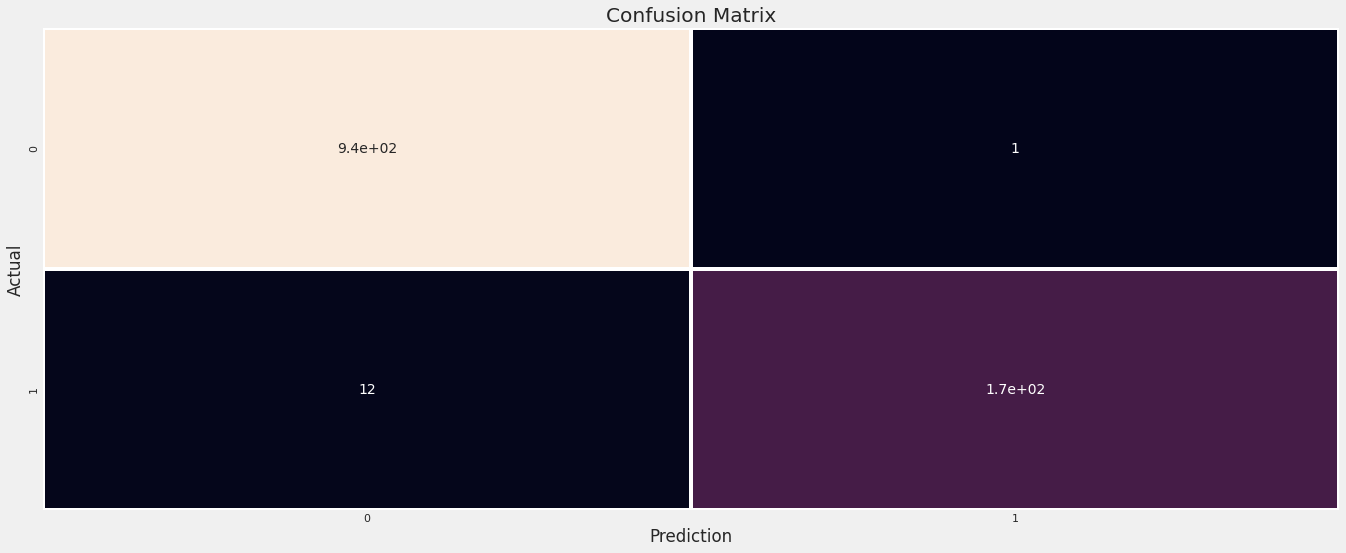

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=3,cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

In [ ]:
#Confusion Matrix Train
cf_matrix1 = confusion_matrix(y_train, y_pred_train)

print(cf_matrix1)

[[3741    0]
 [   0  763]]


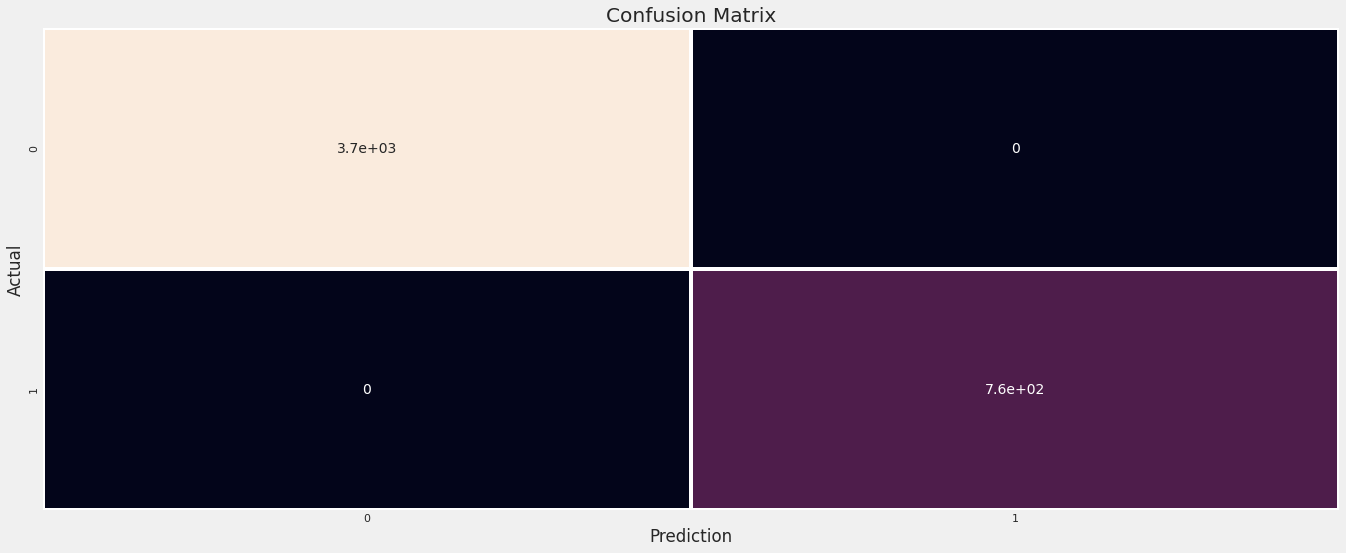

In [ ]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,linewidths=3,cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

## Top Feature Insight

Kelompok kami memutuskan untuk memilih model Catboost sebagai predicted model. Jika dilihat dari feature importance score dari model Catboost, beberapa feature yang menjadi important predictor adalah feature Tenure, Complain, NumberOfAddress, DaySinceLastOrder, dan MaritalStatus_Single

Berikut merupakan beberapa insight dari feature-feature tersebut:

### 1. Tenure

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

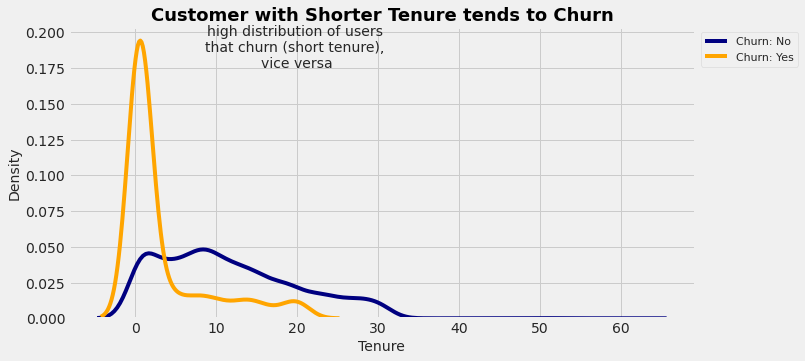

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'orange', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('high distribution of users \nthat churn (short tenure), \nvice versa', 
            xy=(2, 0.2), xytext=(20, 0.175), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

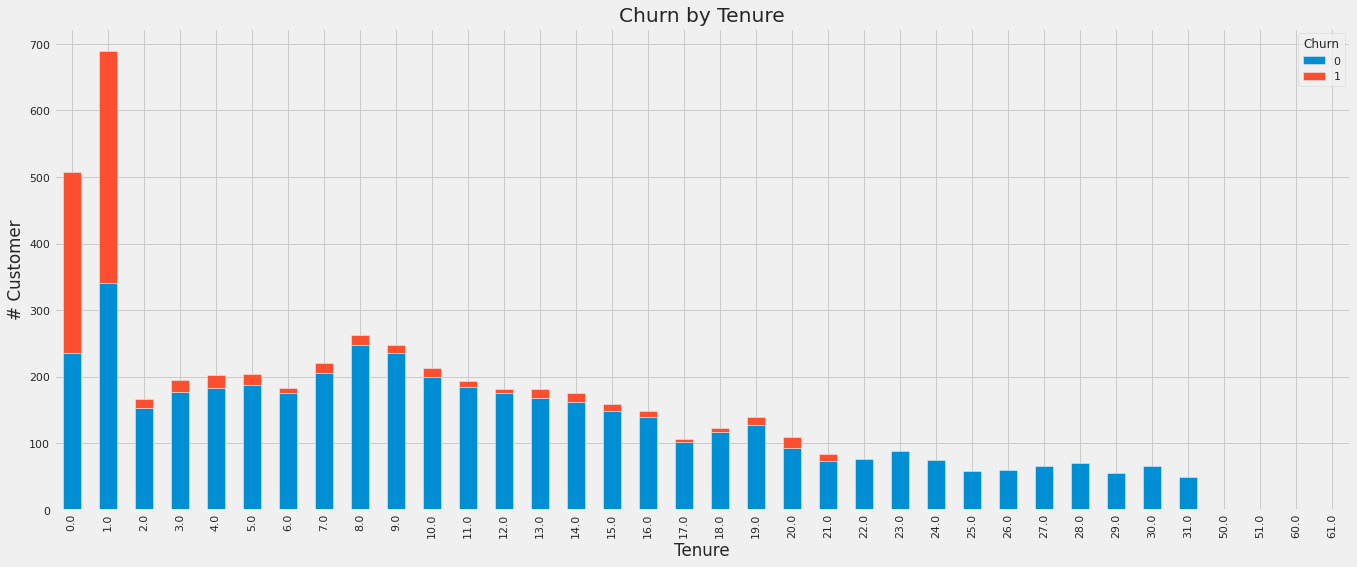

In [ ]:
int_churn_contingency = pd.crosstab(data["Tenure"], data["Churn"])
int_churn_contingency.plot(kind = 'bar', stacked = 'true', title = "Churn by Tenure")
int_churn_contingency
plt.xlabel('Tenure')
plt.ylabel('# Customer')
plt.show()

**Insight :**

Customer dengan Tenure rendah (2 bulan pertama) memiliki potensi churn jauh lebih tinggi daripada tenure menengah keatas. 

**business recommendation :**

Memberikan promo kepada customer dengan tenure < 2 bulan. Promo tersebut bisa berupa Coupon agar customer bisa terus bertahan dan kembali berbelanja di e-commerce. Selain itu, handle complain juga dapat membantu mendapatkan pelanggan royal

### 2. Complain

In [ ]:
group_by_complain = df.groupby(['PreferedOrderCat','Complain']).agg({'CustomerID':'nunique'}).reset_index()
group_by_complain['Complain'] = group_by_complain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

group_by_complain2 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
group_by_complain3 = group_by_complain.merge(group_by_complain2, how='left',
              on='PreferedOrderCat')

group_by_complain3.columns = ['PreferedOrderCat','Complain','Num_Customer','AllCustomer']
group_by_complain3['Ratio'] = (group_by_complain3['Num_Customer'] / group_by_complain3['AllCustomer'] * 100.0).round(2)
group_by_complain3

,PreferedOrderCat,Complain,Num_Customer,AllCustomer,Ratio
0,Fashion,Not Complain,584,826,70.70
1,Fashion,Complain,242,826,29.30
2,Grocery,Not Complain,284,410,69.27
3,Grocery,Complain,126,410,30.73
4,Laptop & Accessory,Not Complain,1492,2050,72.78
5,Laptop & Accessory,Complain,558,2050,27.22
6,Mobile,Not Complain,573,809,70.83
7,Mobile,Complain,236,809,29.17
8,Mobile Phone,Not Complain,897,1271,70.57
9,Mobile Phone,Complain,374,1271,29.43


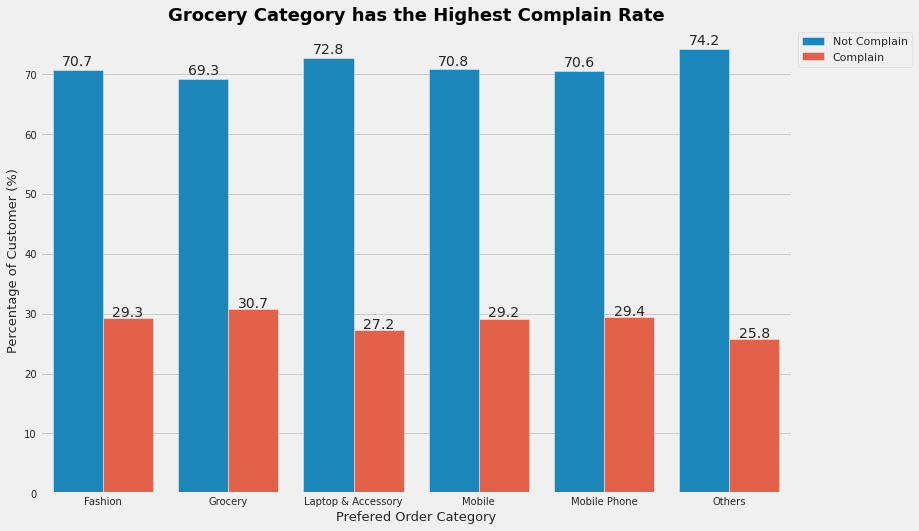

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=group_by_complain3, x='PreferedOrderCat', y='Ratio', hue='Complain')
plt.title('Grocery Category has the Highest Complain Rate', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Prefered Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

In [ ]:
churn_by_complain = df.groupby(['Churn','Complain']).agg({'CustomerID':'nunique'}).reset_index()
churn_by_complain['Complain'] = group_by_complain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})
churn_by_complain

,Churn,Complain,CustomerID
0,0,Not Complain,3586
1,0,Complain,1096
2,1,Not Complain,440
3,1,Complain,508


**Insight**

Persentase churn akibat customer complain
(31.67%) hampir 3 kali lebih besar dari
persentase churn total customer yang
tidak complain (10.93%).

**business recommendation**

Mengutamakan customer satisfaction dengan cara membagi customer menjadi 2, yaitu : Priority Customer (customer complain dan berpotensi churn) dan Regular Customers. 


### 3. OrderCategory

In [ ]:
df12_new = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
df12_new1 = df12.merge(df12_new, how='left',
              on='PreferedOrderCat')

df12_new1.columns = ['PreferedOrderCat','Churn','Num_Customer','AllCustomer']
df12_new1['Ratio'] = (df12_new1['Num_Customer'] / df12_new1['AllCustomer'] * 100.0).round(2)
df12_new1

,PreferedOrderCat,Churn,Num_Customer,AllCustomer,Ratio
0,Fashion,0,698,826,84.50
1,Fashion,1,128,826,15.50
2,Grocery,0,390,410,95.12
3,Grocery,1,20,410,4.88
4,Laptop & Accessory,0,1840,2050,89.76
5,Laptop & Accessory,1,210,2050,10.24
6,Mobile,0,589,809,72.81
7,Mobile,1,220,809,27.19
8,Mobile Phone,0,921,1271,72.46
9,Mobile Phone,1,350,1271,27.54


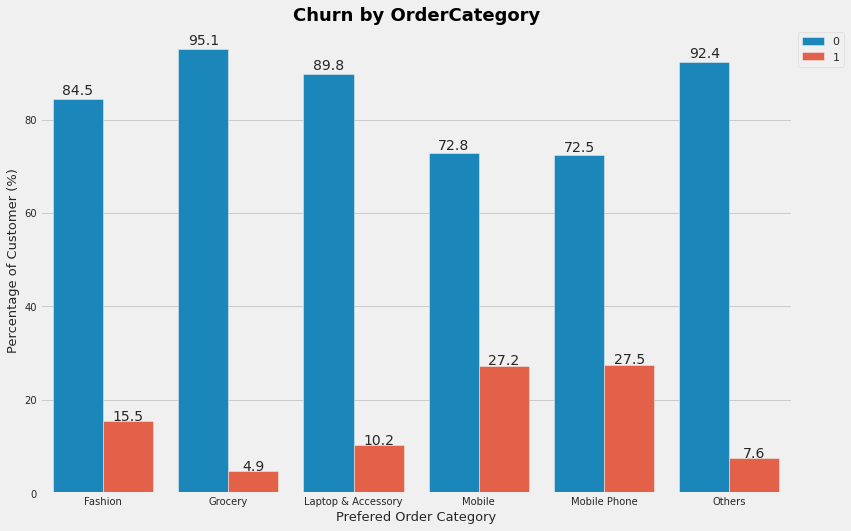

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df12_new1, x='PreferedOrderCat', y='Ratio', hue='Churn')
plt.title('Churn by OrderCategory', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Prefered Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

**1. Insight :**

Fashion termasuk barang yang bisa dibeli setiap bulan seharusnya tingkat churn tidak tinggi

**Business Recommendation :**

Memberikan penawaran produk yang berbeda dengan produk yang sudah dibeli oleh customer. 

 *2. Insight :** 

Laptop & Accessorry dan Mobile bukan termasuk barang yang dibeli setiap bulan 

**Business Recommendation :**
Untuk customer yang baru membeli barang elektronik bisa dilakukan cross-selling dengan penawaran aksesoris elektronik, seperti keyboard, mouse, dll. 